# Import Packages

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import itertools
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt


# Dataframe Generation

In [98]:
df = pd.read_csv("./Data/CSV/project2_dataset.csv")
df.columns

Index(['Date', 'Search AD', 'Membership', 'Direct Volumn', 'Search Volumn',
       'Referral Volumn', 'Number of Ads', 'Display AD', 'Seller Community',
       'State'],
      dtype='object')

In [99]:
df = df.iloc[:358,:]
df['Membership_Fee']=df['Membership']*3000
df['Total_Volumn']=df['Direct Volumn']+df['Referral Volumn']+df['Search Volumn']
df['Total_AD_Revenue'] = df['Search AD']+df['Display AD']
def round_the_number_to_int(col_list):
    df[col_list]=df[col_list].round(0).astype(int)
    
round_the_number_to_int(['Search AD', 'Membership', 'Direct Volumn', 'Search Volumn',
       'Referral Volumn', 'Number of Ads', 'Display AD', 'Seller Community','Membership_Fee','Total_Volumn','Total_AD_Revenue'])
df['Date'] = pd.to_datetime(df['Date'])
df.head()


,Date,Search AD,Membership,Direct Volumn,Search Volumn,Referral Volumn,Number of Ads,Display AD,Seller Community,State,Membership_Fee,Total_Volumn,Total_AD_Revenue
0,2010-10-01,611911,3164,254742,925349,532800,57,910262,8621,0,9492000,1712891,1522173
1,2010-10-02,304285,4367,320438,1182742,683447,57,910262,160992,0,13101000,2186627,1214547
2,2010-10-03,314935,5693,298304,1201440,672891,57,910262,4256748,0,17079000,2172635,1225197
3,2010-10-04,735275,7634,1212023,1321080,1036487,57,910262,286411,0,22902000,3569590,1645537
4,2010-10-05,773973,7861,1235900,1412837,1100739,57,910262,2762952,0,23583000,3749476,1684235


In [100]:
def resample_time_series(time):    
    df_mean = df.resample(time, on='Date').mean()
    return df_mean    

df_resample = resample_time_series('3D')
df_resample.head()

,Search AD,Membership,Direct Volumn,Search Volumn,Referral Volumn,Number of Ads,Display AD,Seller Community,State,Membership_Fee,Total_Volumn,Total_AD_Revenue
Date,,,,,,,,,,,,
2010-10-01,410377.000000,4408.000000,2.911613e+05,1.103177e+06,6.297127e+05,57.000000,910262.000000,1.475454e+06,0.0,13224000.0,2.024051e+06,1.320639e+06
2010-10-04,775910.666667,7942.000000,1.229509e+06,1.426279e+06,1.094486e+06,43.333333,701498.000000,1.147197e+06,0.0,23826000.0,3.750274e+06,1.477409e+06
2010-10-07,796799.333333,9664.666667,9.437610e+05,1.857386e+06,1.162299e+06,16.000000,283970.000000,1.101803e+05,0.0,28994000.0,3.963447e+06,1.080769e+06
2010-10-10,778286.333333,9917.666667,8.302543e+05,1.904105e+06,1.125233e+06,23.333333,368987.333333,5.760600e+04,0.0,29753000.0,3.859592e+06,1.147274e+06
2010-10-13,899944.666667,10166.333333,1.151190e+06,1.927501e+06,1.190739e+06,36.666667,635672.666667,2.293541e+06,0.0,30499000.0,4.269430e+06,1.535617e+06


In [104]:
# df = df.set_index('Date')
# df_time = df.join(pd.get_dummies(df.index.get_level_values(0).weekday_name)
#                     .set_index(df.index))
df['dayofweek_name'] = df['Date'].dt.weekday_name
# df[['Date','dayofweek_name']].head()
df['is_weekend'] = np.where(df['dayofweek_name'].isin(['Sunday','Saturday']),1,0)
df_time = df
df_time
# df_time.to_csv("./Data/CSV/df_time_dataset.csv")


,Date,Search AD,Membership,Direct Volumn,Search Volumn,Referral Volumn,Number of Ads,Display AD,Seller Community,State,Membership_Fee,Total_Volumn,Total_AD_Revenue,dayofweek_name,is_weekend
0,2010-10-01,611911,3164,254742,925349,532800,57,910262,8621,0,9492000,1712891,1522173,Friday,0
1,2010-10-02,304285,4367,320438,1182742,683447,57,910262,160992,0,13101000,2186627,1214547,Saturday,1
2,2010-10-03,314935,5693,298304,1201440,672891,57,910262,4256748,0,17079000,2172635,1225197,Sunday,1
3,2010-10-04,735275,7634,1212023,1321080,1036487,57,910262,286411,0,22902000,3569590,1645537,Monday,0
4,2010-10-05,773973,7861,1235900,1412837,1100739,57,910262,2762952,0,23583000,3749476,1684235,Tuesday,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,2011-09-19,1087638,19312,586295,1049896,1337351,16,205362,12910,1,57936000,2973542,1293000,Monday,0
354,2011-09-20,1078817,20369,568037,1035410,1340636,13,246900,13074,1,61107000,2944083,1325717,Tuesday,0
355,2011-09-21,1102993,20742,536426,1018120,1349269,19,289600,12539,1,62226000,2903815,1392593,Wednesday,0
356,2011-09-22,1063943,20450,458655,1014211,1323724,21,294580,12957,1,61350000,2796590,1358523,Thursday,0


# Descriptive Data Analysis

In [102]:
df.describe()
df_normalized = df.copy()
df_normalized = df_normalized[['Search AD', 'Membership', 'Direct Volumn', 'Search Volumn','Referral Volumn', 'Number of Ads', 'Display AD', 'Seller Community','Membership_Fee','Total_Volumn','Total_AD_Revenue']]
df_normalized.head()
df_normalized=(df_normalized-df_normalized.mean())/df_normalized.std()
df_normalized
df_normalized.to_csv("./Data/CSV/normalized_dataset.csv")

# print(df_normalized.head())
# df_normalized.describe().loc['mean',:]
# df_normalized.describe().loc['std',:]

# Save Dataframe Regression Line Plot

In [6]:
def get_regression_plot_between_variables (X_Variable_Name,Y_Variable_Name,PNG_Name):

    X = df_normalized.loc[:, X_Variable_Name].values.reshape(-1, 1)  # values converts it into a numpy array
    Y = df_normalized.loc[:, Y_Variable_Name].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
    linear_regressor = LinearRegression()  # create object for the class
    linear_regressor.fit(X, Y)  # perform linear regression
    Y_pred = linear_regressor.predict(X)  # make predictions
    plt.scatter(X, Y)
    plt.plot(X, Y_pred, color='red')
    plt.xlabel(X_Variable_Name, size=18)
    plt.ylabel(Y_Variable_Name, size=18)
    plt.savefig('./Plots/%s.png'% PNG_Name,bbox_inches = 'tight')

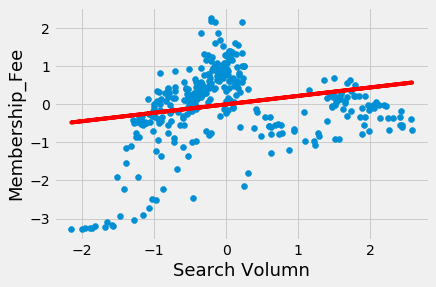

In [7]:
get_regression_plot_between_variables('Search Volumn','Membership_Fee','Membership_Fee_vs_SearchVolumn')

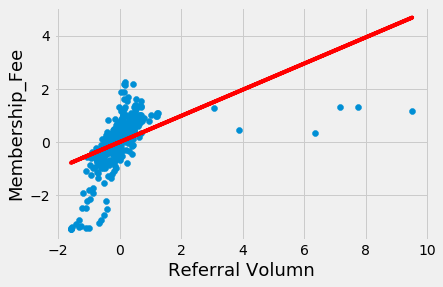

In [8]:
get_regression_plot_between_variables('Referral Volumn','Membership_Fee','Membership_Fee_vs_ReferralVolumn')

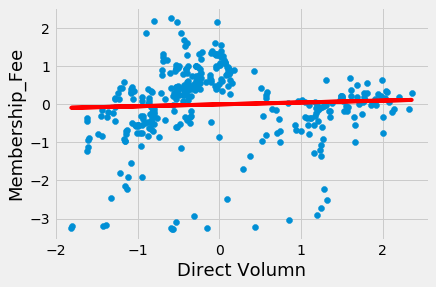

In [9]:
get_regression_plot_between_variables('Direct Volumn','Membership_Fee','Membership_Fee_vs_DirectVolumn')

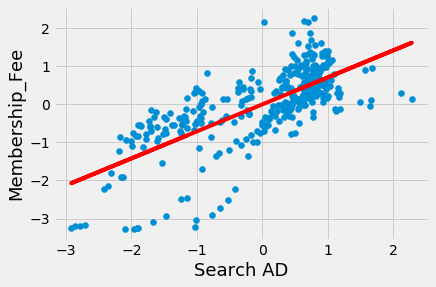

In [10]:
get_regression_plot_between_variables('Search AD','Membership_Fee','Membership_Fee_vs_SearchAD')

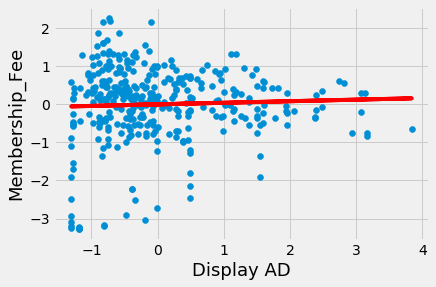

In [11]:
get_regression_plot_between_variables('Display AD','Membership_Fee','Membership_Fee_vs_DisplayAD')

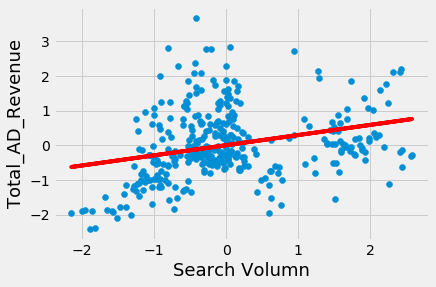

In [12]:
get_regression_plot_between_variables('Search Volumn','Total_AD_Revenue','Total_AD_Revenue_vs_SearchVolumn')

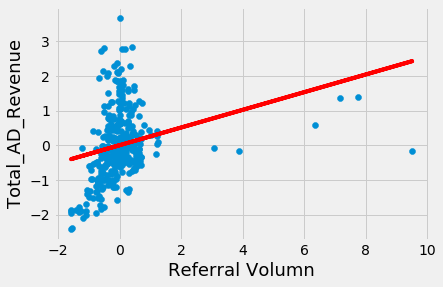

In [13]:
get_regression_plot_between_variables('Referral Volumn','Total_AD_Revenue','Total_AD_Revenue_vs_ReferralVolumn')

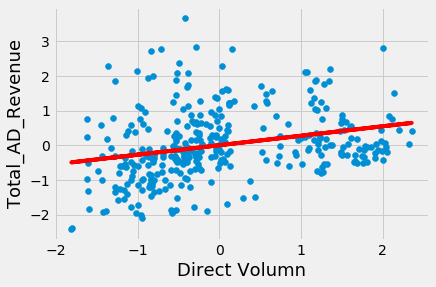

In [14]:
get_regression_plot_between_variables('Direct Volumn','Total_AD_Revenue','Total_AD_Revenue_vs_DirectVolumn')

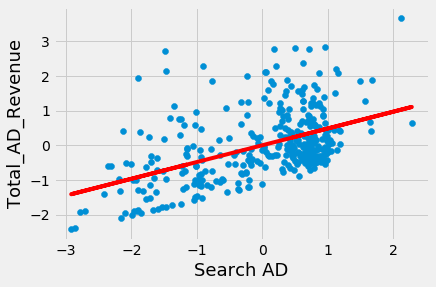

In [15]:
get_regression_plot_between_variables('Search AD','Total_AD_Revenue','Total_AD_Revenue_vs_SearchAD')

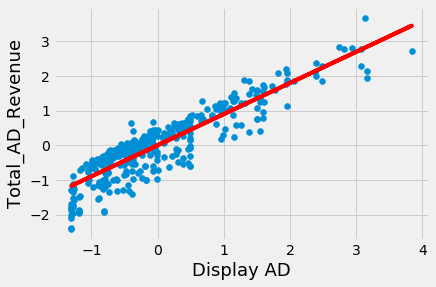

In [16]:
get_regression_plot_between_variables('Display AD','Total_AD_Revenue','Total_AD_Revenue_vs_DisplayAD')

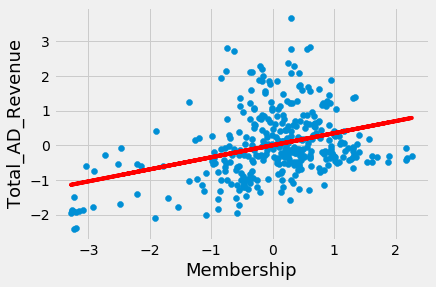

In [17]:
get_regression_plot_between_variables('Membership','Total_AD_Revenue','Total_AD_Revenue_vs_Membership')

# Normalized Data Distribution Histogram

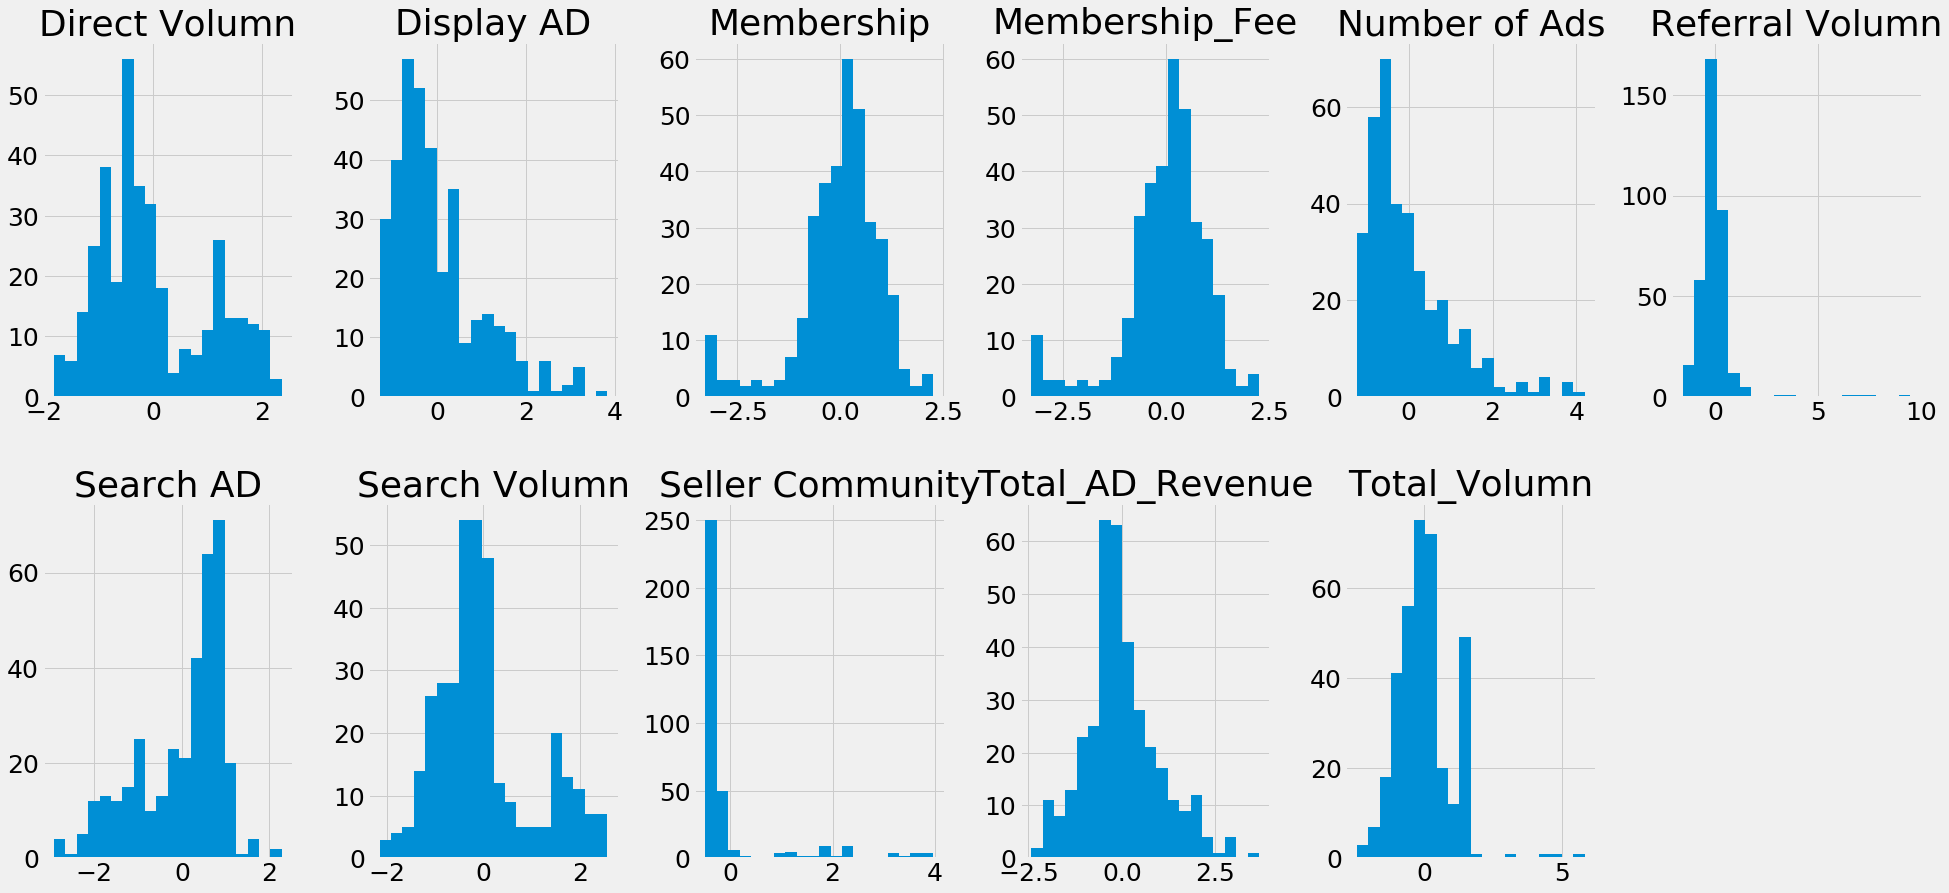

In [18]:
# ax = df_normalized.plot(position =0.5, kind = 'bar',subplots=True,fontsize=5,figsize=(8,10),grid = True)
plt.rcParams.update({'font.size': 25})
df_normalized_plot = df_normalized.hist(figsize=(30,14),layout=(2,6),bins=20)

# Correlation Heatmap

(11.5, -0.5)

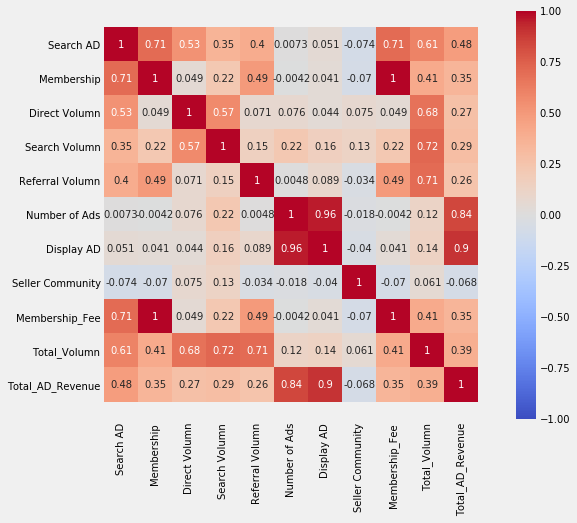

In [19]:
plt.rcParams.update({'font.size': 10})
corrmat = df_normalized.corr()
f, ax = plt.subplots(figsize=(12, 7))
sns.heatmap(corrmat, vmax=1,vmin = -1, square=True,cmap="coolwarm",annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

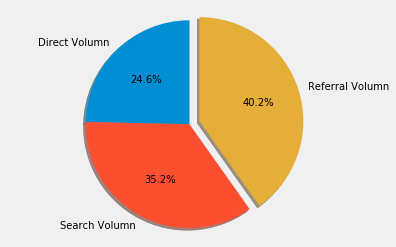

In [20]:
df_volumn = df[['Direct Volumn', 'Search Volumn','Referral Volumn']]
df_volummmm =df_volumn.sum().to_frame()
df_volummmm.rename(columns={0:''}, 
                 inplace=True)
df_volummmm[''].sum()
df_volummmm['']=df_volummmm['']/df_volummmm[''].sum()
df_volummmm['']
labels = 'Direct Volumn', 'Search Volumn', 'Referral Volumn'
sizes = [246, 351, 401]
explode = (0, 0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90,)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [21]:
# plt.rcParams.update({'font.size': 12})
# ax1 = df_normalized.boxplot(figsize=(20,10))
# plt.show()

# Time Series Plot

## Number of Ads

In [22]:
# df_ad = df[['Date','Number of Ads']]
# df_ad = df_ad.set_index('Date')
def get_simple_timeseries_plot(columnname,line_color=None,colormap=None):
    ax = df_resample[columnname].plot(color = line_color, figsize=(16, 6),linewidth =3, fontsize=15,colormap=colormap)
    ax.set_xlabel('Date')
    ax.set_ylabel(columnname)
    ax.axvline('2011-03-01',linewidth =3,color='red')

In [23]:
# get_simple_timeseries_plot('Number of Ads',line_color='Blue')

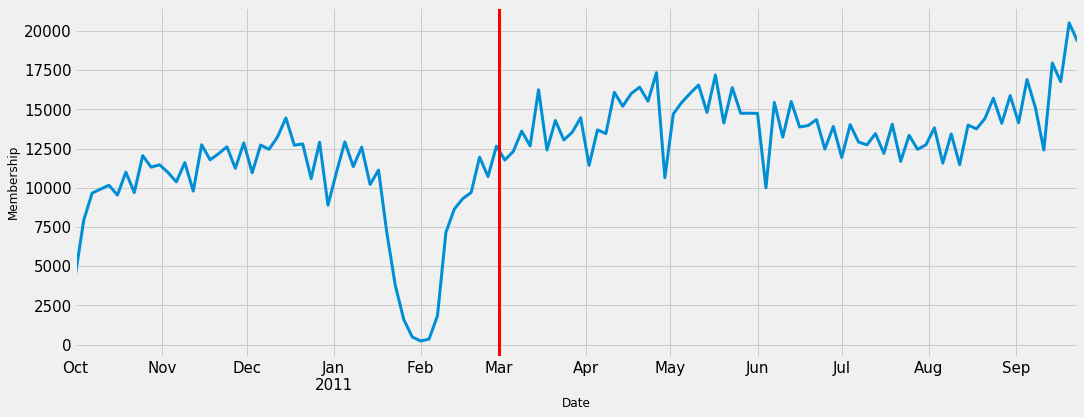

In [24]:
get_simple_timeseries_plot('Membership')

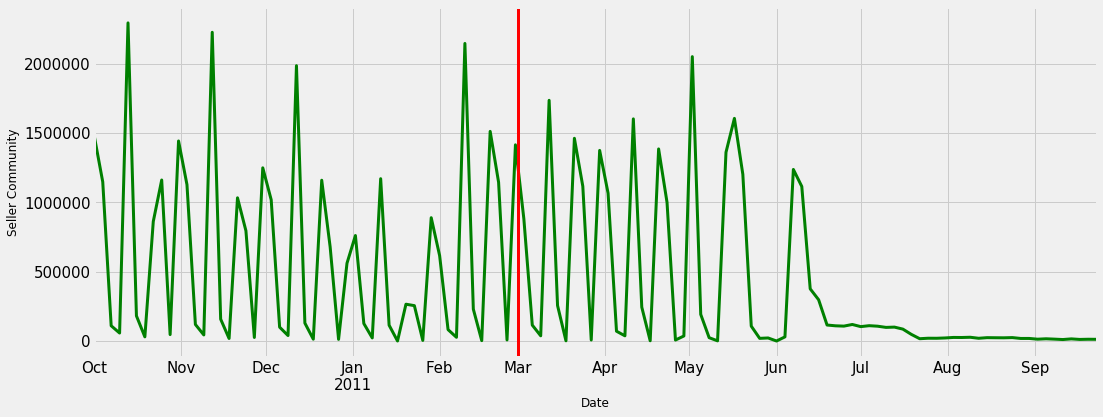

In [25]:
get_simple_timeseries_plot('Seller Community',line_color='Green')

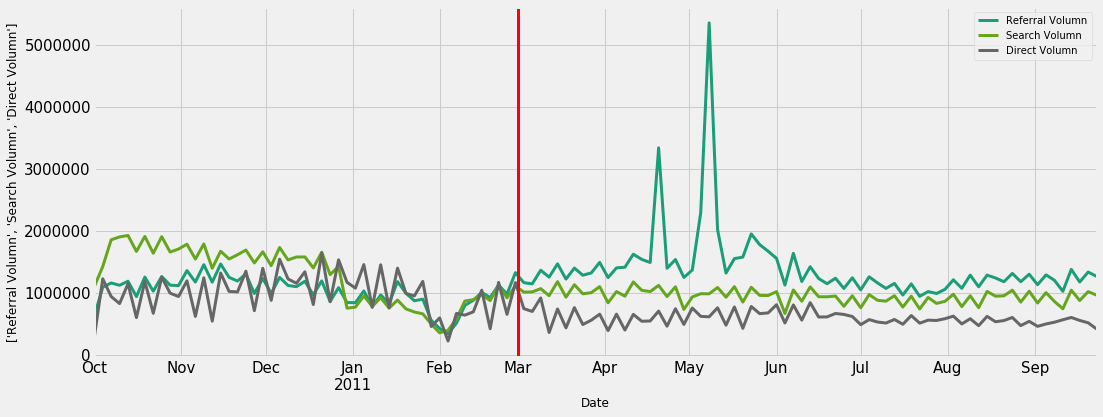

In [26]:
get_simple_timeseries_plot(['Referral Volumn','Search Volumn','Direct Volumn'],colormap='Dark2')

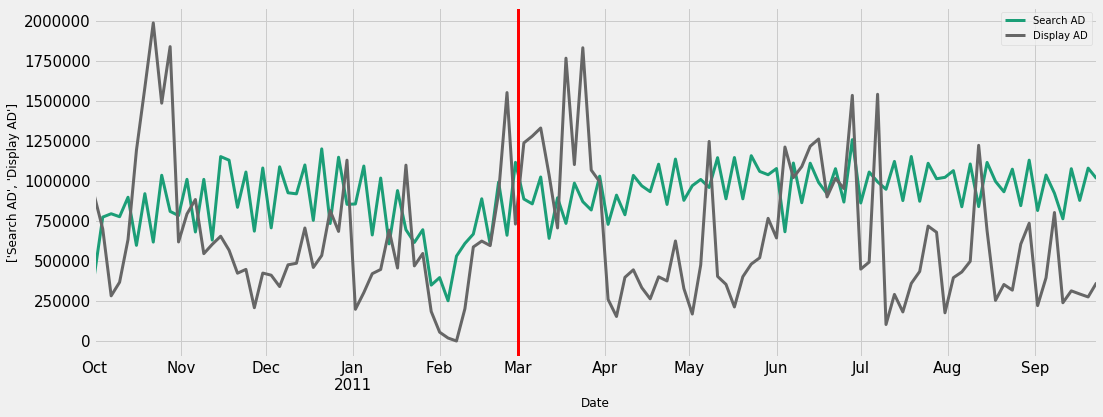

In [27]:
get_simple_timeseries_plot(['Search AD','Display AD'],colormap='Dark2')

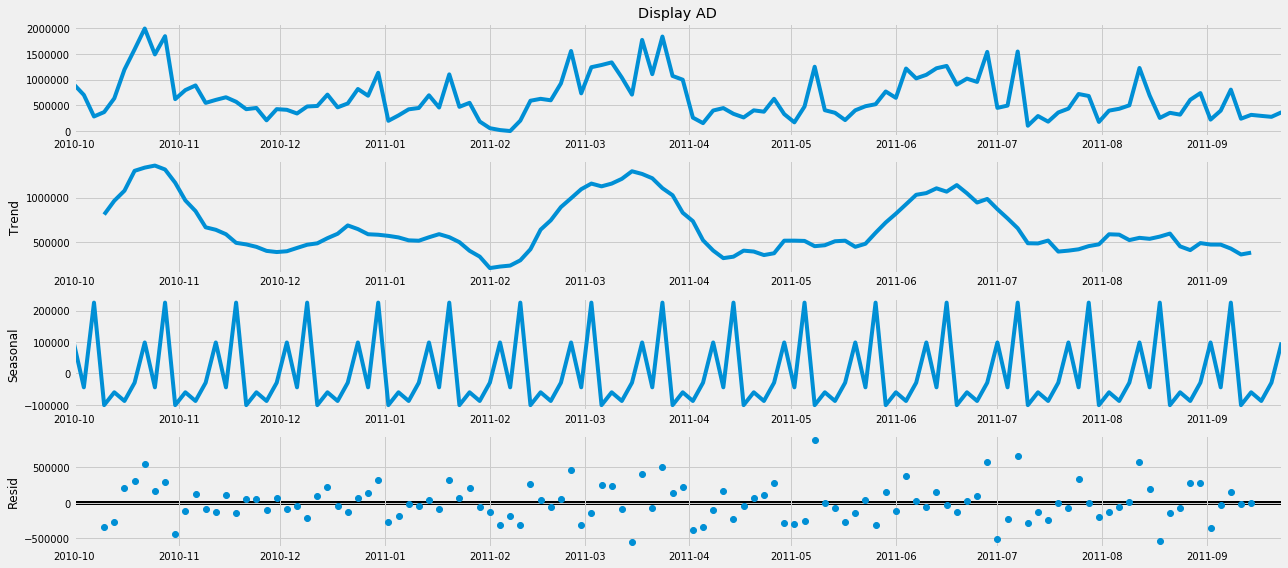

In [28]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(df_resample['Display AD'], model='additive')
fig = decomposition.plot()
plt.show()
